# Metrics for Linear Regression

Confusion matrix does not make sense for linear regression, where the outcome is a numeric value.

## Mean Squared Error

Average squared error over entire dataset


*Mean squared error (MSE)* = $ \frac{1}{N} \sum_{n=1}^{N} {(\hat{y_i} - y_i)}^2$

* Very commonly used
* sklearn.metrics.mean_squared_error

## R2: Coefficient of Determiniation

* $ R^2 = 1 - \frac{sum\;of\;squared\;error\;(sse)}{Var(y)}$ which is betweeen 0 and 1
* Interpretation: Fraction of variance accounted for by the model
* Basically, standardized version of MSE
* Good $R^2$ are determined by the actual problem
* $R^2$ always increases when more variables are added to the model
$Adjusted\;R^2 = 1 - (1 - R^2) \frac{no.\;of\;data\;pts - 1}{no.\;data\;pts-no\;vars\;-1}$
* Takes into account of the effect of adding more variable such that it only increases when the added variables have significant effect in prediction
* $R^2$ will always increase when more explanatory variables are added to the model, highest $R^2$ may not be the best model
* Adjusted $R^2$ is a better metric for multiple variates regression
* sklearn.metrics.r2_score

## Normal Distribution

Guassian Distribution Probability Density Function

$$P(x) = \frac{1}{{\sqrt {2\pi\sigma^2 } }}e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

* $\mu$ is the mean or expectation of the distribution
* $\sigma$ is the standard deviation
* $\sigma^2$ is the variance

Why do we study normal distribution so often?

* Central Limit Theorem: no matter what is the original distribution of X, the mean of X will follow a normal distribution $\bar{X} \sim N (\mu,\frac{\sigma^2}{n})$
* Distribution is symmetric, standard deviations give us an idea of the distribution of the density, used for confidence intervals
    * 68% with in 1 $\sigma$
    * 95% within 2 $\sigma$
    * 99.7% within 3 $\sigma$

In [3]:
# Shout out for plot code: https://www.datacamp.com/community/tutorials/probability-distributions-python

# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [4]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [6]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=100000,loc=0,scale=1)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

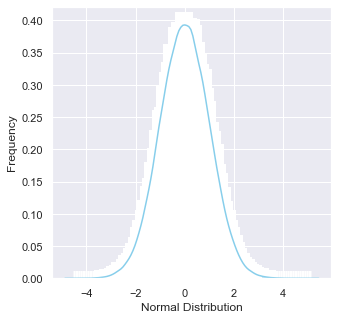

In [7]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

## Confidence Interval

* An average computed on a sample is merely an estimate of the true population mean
* Confidence interval: Quantifies margin-of-error between sample metric and true metric due to sampling randomness
* Informal interpretation: with x% confidence, true metric lies within the interval
* Precisely: if the true distribution is as stated, then with x% probability the observed value is in the internal
* Z-score: quantifies how much the value is above or below the mean in terms of its standard deviation
* typically see 90%, 95%, and 99% used as the confidence level

For population proportion (e.g. truth) the confidence interval is

* CI = $p \pm z(p(1 - p)/n)^\frac{1}{2}$
* Where p is the sample proportion, n is sample size, and z is z score in the table below, which is determined by the confidence level


| Prob = r | z-score = $z_r$ |
| --- | --- |
| 0.90 | 1.645 |
| 0.95 | 1.96 |
| 0.98 | 2.326 |
| 0.99 | 2.576 |


For population mean (i.e. truth), the confidence interval is

* CI = $\bar{X}\pm z*s/n^\frac{1}{2}$
* Where $\bar{X}$ is the sample mean, n is sample size, s is sample standard deviation, and z is z-score
* Assumptions: n > 30 and p not close to 0 or 1
* Doesn't capture error due to other sources of bias